<a href="https://colab.research.google.com/github/Vishwaja-Matikonda/Breast-Tumour-Prediction/blob/main/Breast_Cancer_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read data
df = pd.read_csv('data.csv')
# data overview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# shuffle the data because data in series
df = df.sample(frac=1)

In [6]:
df.iloc[:10]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.02791,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.013930,0.018000,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.11420,0.20700,0.24370,0.07828,0.2455,0.06596,NaN
312,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.02548,0.1601,0.06140,0.3265,0.6594,2.346,25.18,0.006494,0.027680,0.031370,0.010690,0.01731,0.004392,14.19,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253,NaN
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,0.3534,0.6724,2.225,26.03,0.006583,0.006991,0.005949,0.006296,0.02216,0.002668,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
126,866083,M,13.61,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.03085,0.1761,0.06130,0.2310,1.0050,1.752,19.83,0.004088,0.011740,0.017960,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.14710,0.28840,0.37960,0.13290,0.3470,0.07900,NaN
326,89524,B,14.11,12.88,90.03,616.5,0.09309,0.05306,0.017650,0.02733,0.1373,0.05700,0.2571,1.0810,1.558,23.92,0.006692,0.011320,0.005717,0.006627,0.01416,0.002476,15.53,18.00,98.40,749.9,0.12810,0.11090,0.05307,0.05890,0.2100,0.07083,NaN
444,9110127,M,18.03,16.85,117.50,990.0,0.08947,0.12320,0.109000,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.015600,0.029750,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225,NaN
417,90602302,M,15.50,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.08481,0.2085,0.06864,1.3700,1.2130,9.424,176.50,0.008198,0.038890,0.044930,0.021390,0.02018,0.005815,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480,NaN
207,879830,M,17.01,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.05390,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.015030,0.019460,0.011230,0.02294,0.002581,19.80,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469,NaN
229,881861,M,12.83,22.33,85.26,503.2,0.10880,0.17990,0.169500,0.06861,0.2123,0.07254,0.3061,1.0690,2.257,25.13,0.006983,0.038580,0.046830,0.014990,0.01680,0.005617,15.20,30.15,105.30,706.0,0.17770,0.53430,0.62820,0.19770,0.3407,0.12430,NaN
239,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.08811,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.027850,0.026020,0.013740,0.01226,0.002759,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496,NaN


In [7]:
df = df.drop(columns=['Unnamed: 32', 'id'])

In [8]:
# no of rows and columns
df.shape

(569, 31)

In [9]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
# Except 'diagnosis' all the columns are numeric
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# check for null values in dataset
df.isnull().values.any()

False

In [12]:
# Count class labels
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

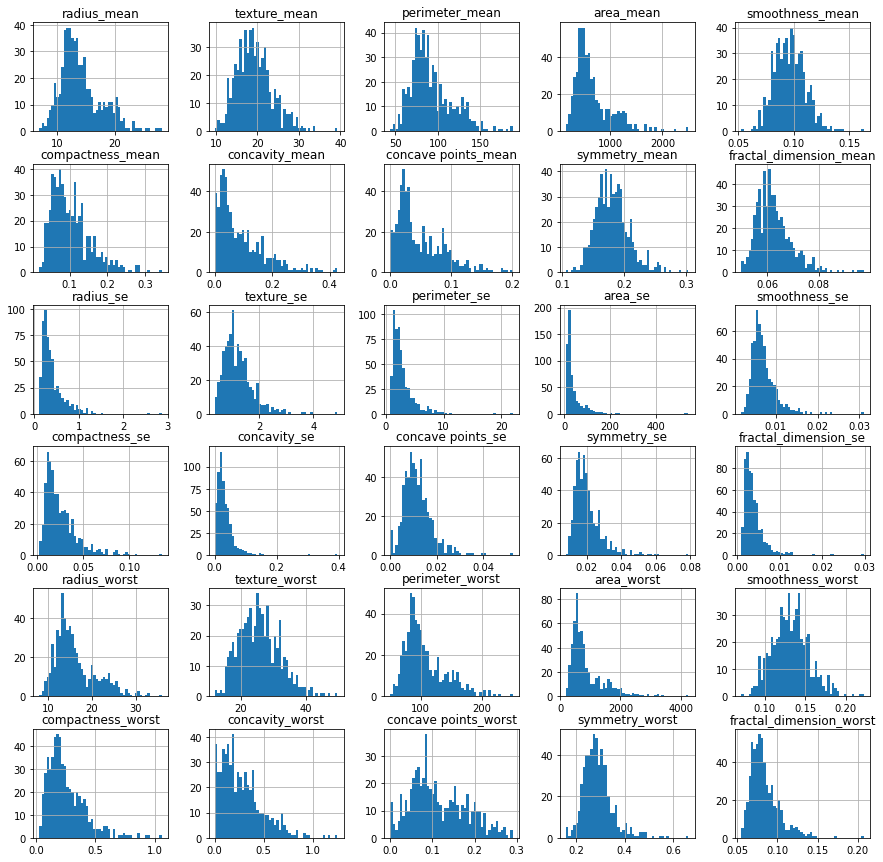

In [25]:
# Data visualization to create histogram
df.hist(bins=50, figsize=(15, 15))
plt.show()



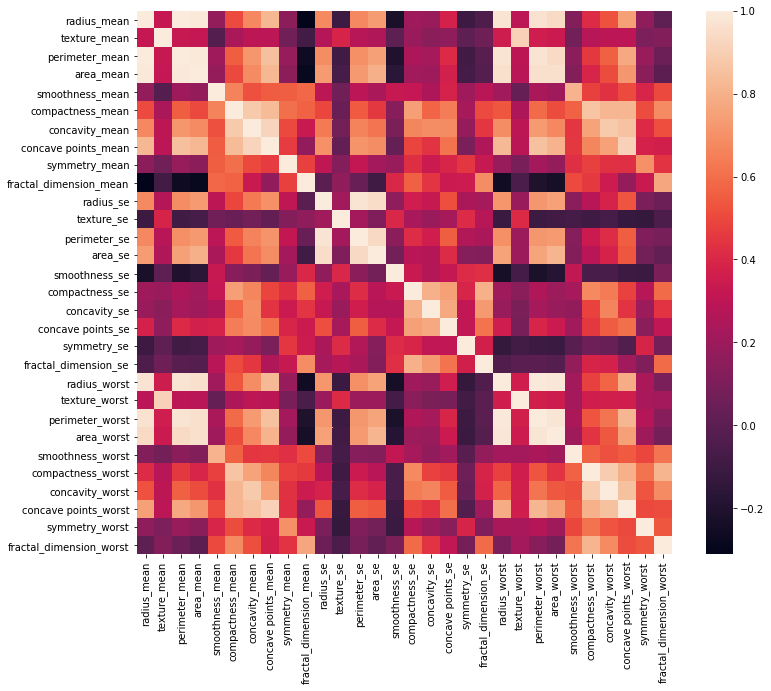

In [26]:
# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)


diagnosis
B    357
M    212
dtype: int64


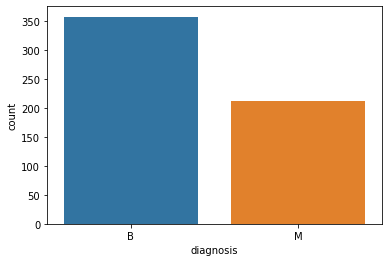

In [27]:
print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

In [29]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

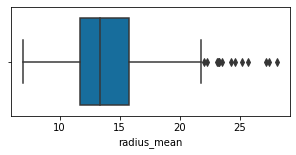

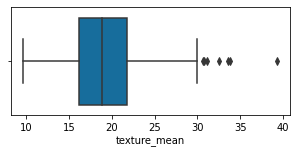

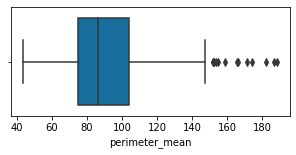

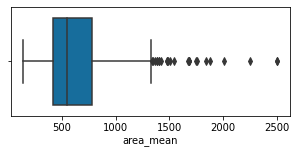

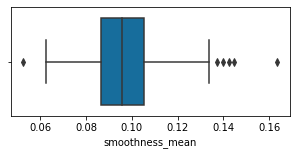

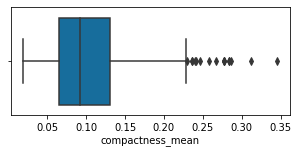

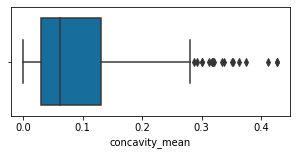

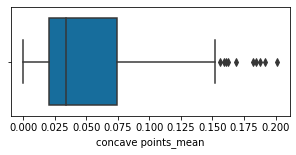

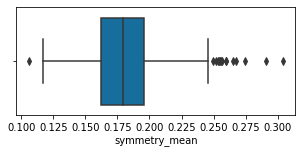

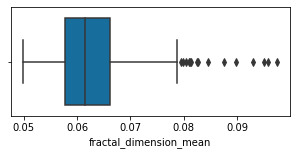

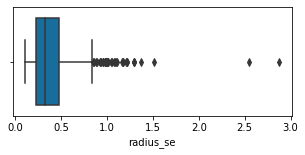

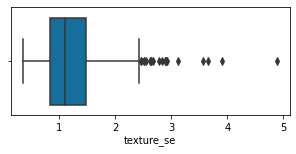

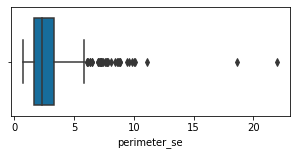

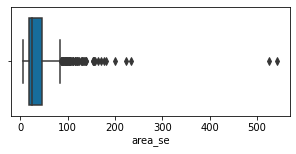

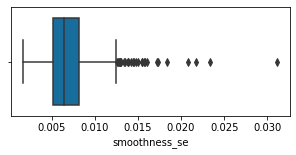

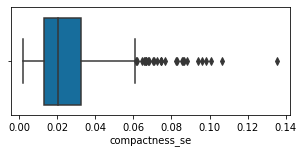

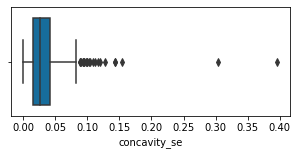

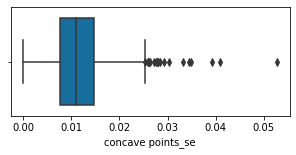

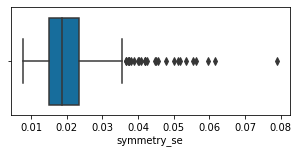

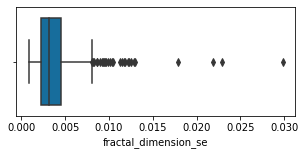

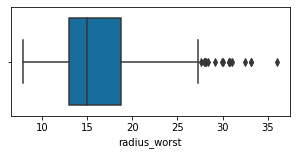

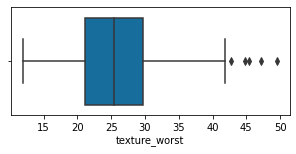

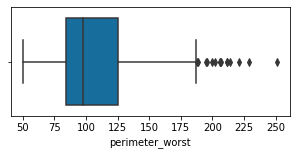

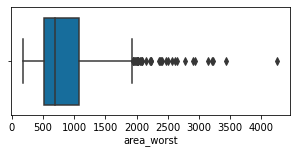

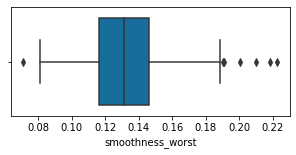

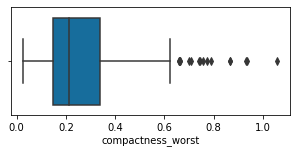

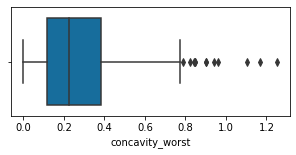

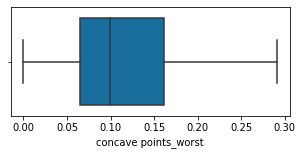

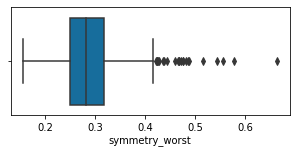

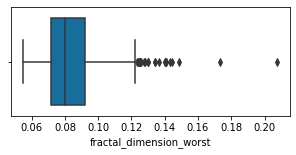

In [30]:
boxPlot(df)

In [31]:

# Quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1

In [32]:
# quartiles and interquartile range

df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((569, 31), (398, 31))

In [33]:
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

In [34]:
# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [35]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 30), (120, 30), (278,), (120,))

In [36]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

In [37]:
# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [38]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}


In [39]:

def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [40]:

acc = []
roc = []

In [42]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [43]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

In [44]:
# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)

In [45]:

# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9532374100719424
Test Set Accuracy 0.9416666666666667 ROC 0.9186299383834723


In [46]:
# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [5 6 6 5 7 6 6 5 5 5]
True Negative:  [22 20 19 21 21 20 21 21 21 19]
False Negative:  [1 1 1 2 0 1 1 2 1 1]
False Positive:  [0 1 2 0 0 1 0 0 0 2]
Accuracy:  [0.96 0.93 0.89 0.93 1.   0.93 0.96 0.93 0.96 0.89]


In [47]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes : 
Training Set Accuracy :  0.9532374100719424
Test Set Accuracy 0.9416666666666667 ROC 0.9186299383834723


In [48]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [5 7 7 7 7 6 6 7 6 6]
True Negative:  [22 20 19 21 20 19 21 21 20 18]
False Negative:  [1 0 0 0 0 1 1 0 0 0]
False Positive:  [0 1 2 0 1 2 0 0 1 3]
Accuracy:  [0.96 0.96 0.93 1.   0.96 0.89 0.96 1.   0.96 0.89]


Text(0.5, 0, 'Algortihms')

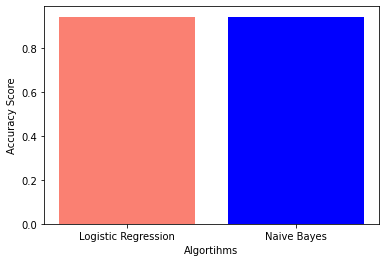

In [49]:
plt.bar(['Logistic Regression', 'Naive Bayes'], acc,
        color=['salmon',  'b'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

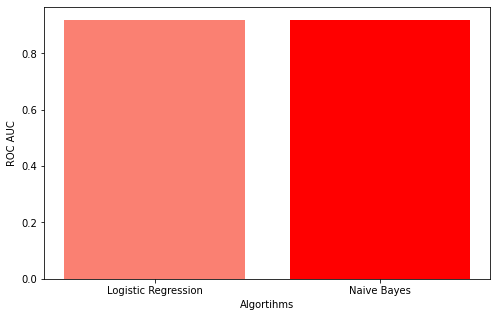

In [50]:
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'Naive Bayes'], roc,
        color=['salmon', 'r'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()